In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import *

In [ ]:
dt=pd.read_csv("/content/creditcardcodsoft.csv")

In [ ]:
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
pd.options.display.max_columns=False

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9965 non-null   int64  
 1   V1      9965 non-null   float64
 2   V2      9965 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [ ]:
dt.isnull().sum()

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
dt=dt.dropna()

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 9963
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    9964 non-null   int64  
 1   V1      9964 non-null   float64
 2   V2      9964 non-null   float64
 3   V3      9964 non-null   float64
 4   V4      9964 non-null   float64
 5   V5      9964 non-null   float64
 6   V6      9964 non-null   float64
 7   V7      9964 non-null   float64
 8   V8      9964 non-null   float64
 9   V9      9964 non-null   float64
 10  V10     9964 non-null   float64
 11  V11     9964 non-null   float64
 12  V12     9964 non-null   float64
 13  V13     9964 non-null   float64
 14  V14     9964 non-null   float64
 15  V15     9964 non-null   float64
 16  V16     9964 non-null   float64
 17  V17     9964 non-null   float64
 18  V18     9964 non-null   float64
 19  V19     9964 non-null   float64
 20  V20     9964 non-null   float64
 21  V21     9964 non-null   float64
 22  

In [ ]:
(dt[dt["Class"]==float(1)]["Class"].count()/dt["Class"].count())*100

0.38137294259333604

In [ ]:
(dt[dt["Class"]==float(0)]["Class"].count()/dt["Class"].count())*100

99.61862705740666

        Time    V1    V2    V3    V4    V5    V6  ...   V23   V24   V25   V26   V27   V28  Amount
Time    1.00  0.04  0.01  0.06  0.13  0.04  0.02  ...  0.01  0.02  0.02  0.32  0.07  0.00    0.02
V1      0.04  1.00  0.10  0.12  0.05  0.20  0.04  ...  0.12  0.01  0.23  0.05  0.09  0.04    0.18
V2      0.01  0.10  1.00  0.11  0.07  0.06  0.02  ...  0.07  0.03  0.14  0.08  0.01  0.03    0.46
V3      0.06  0.12  0.11  1.00  0.02  0.04  0.14  ...  0.04  0.02  0.22  0.07  0.11  0.12    0.16
V4      0.13  0.05  0.07  0.02  1.00  0.09  0.01  ...  0.00  0.05  0.03  0.04  0.00  0.03    0.10
V5      0.04  0.20  0.06  0.04  0.09  1.00  0.11  ...  0.05  0.02  0.02  0.14  0.01  0.15    0.39
V6      0.02  0.04  0.02  0.14  0.01  0.11  1.00  ...  0.01  0.03  0.09  0.05  0.06  0.00    0.22
V7      0.13  0.03  0.13  0.15  0.10  0.14  0.02  ...  0.01  0.00  0.08  0.11  0.12  0.07    0.33
V8      0.01  0.23  0.18  0.00  0.04  0.09  0.01  ...  0.07  0.01  0.03  0.03  0.05  0.08    0.08
V9      0.47  0.11  

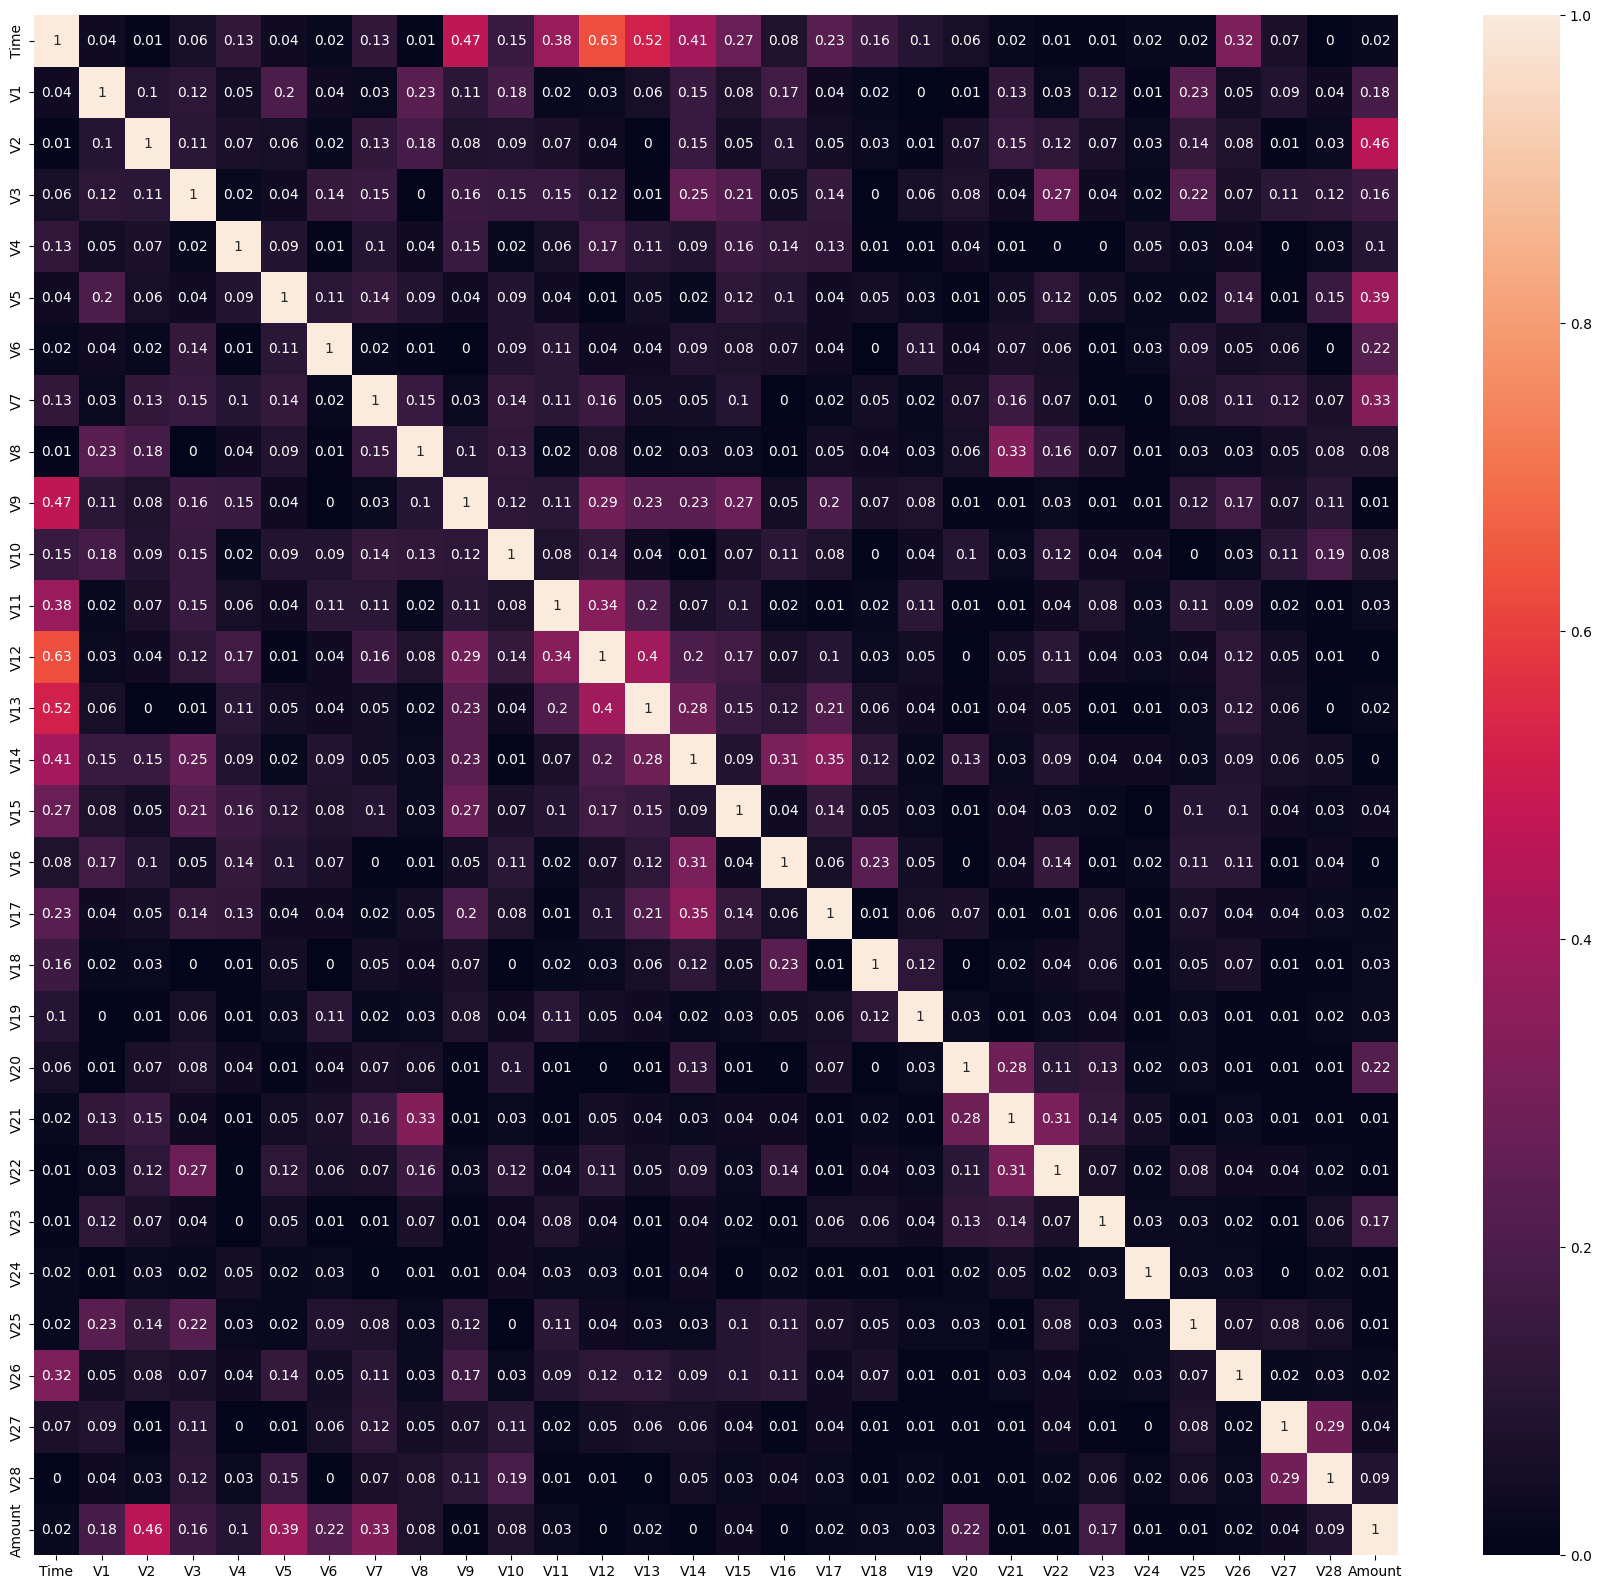

In [ ]:
#the correlation matrix shows none of the features are collinear

corr_matrix = dt.drop(["Class"],axis=1).corr().abs().round(decimals=2)
print(corr_matrix)

import seaborn as sns
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
dt.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000,9964.000000
mean,5933.588719,-0.241530,0.280348,0.906359,0.260247,-0.046342,0.132335,-0.071847,-0.065317,0.801220,-0.222004,0.765820,-1.269198,0.848447,0.699082,-0.127805,-0.008316,0.316889,-0.016717,-0.069244,0.027787,-0.052099,-0.152091,-0.033426,0.021638,0.087302,0.108328,0.005614,0.003051,62.968359,0.003814
std,4448.730907,1.522697,1.308496,1.156948,1.440500,1.183634,1.307586,1.077872,1.260140,1.156424,1.094805,1.169195,1.529064,1.213252,1.240232,0.975537,0.881598,0.965523,0.793982,0.807359,0.590531,0.914735,0.631310,0.488203,0.593818,0.428128,0.562661,0.411434,0.266532,184.626707,0.061641
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,-13.193415,-2.595325,-17.769143,-3.389510,-19.214325,-4.152532,-12.227189,-18.587366,-6.920762,-4.932733,-13.276034,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.000000
25%,2061.000000,-1.011783,-0.208614,0.412198,-0.615591,-0.643060,-0.630075,-0.542336,-0.190495,0.069439,-0.687065,-0.064279,-2.367872,-0.020661,0.078687,-0.707414,-0.495795,-0.182177,-0.450869,-0.551038,-0.149775,-0.268191,-0.548412,-0.174222,-0.327438,-0.157704,-0.328193,-0.084489,-0.015751,5.000000,0.000000
50%,4546.000000,-0.372609,0.286168,0.943149,0.218492,-0.153090,-0.153577,-0.054658,0.012466,0.804930,-0.339972,0.746752,-1.616357,0.914859,0.898178,-0.007462,0.065802,0.296402,0.025779,-0.075870,-0.020930,-0.123101,-0.136078,-0.046009,0.079935,0.121180,0.043395,-0.004505,0.015904,15.950000,0.000000
75%,10162.250000,1.151550,0.900736,1.601871,1.119367,0.371762,0.503376,0.476280,0.273016,1.506066,0.174952,1.575650,0.086676,1.766764,1.497831,0.537830,0.546496,0.780910,0.459390,0.442998,0.156913,0.032707,0.247913,0.081288,0.410877,0.359418,0.478249,0.121045,0.077418,50.792500,0.000000
max,14861.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,12.259949,12.018913,3.774837,4.465413,5.748734,3.635042,4.087802,7.893393,4.115560,4.555359,8.012574,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
#check p value for all features to find the significant features

# import statsmodels.api as sm

# X = sm.add_constant(dt.drop(["Class"],axis=1))
# y=dt["Class"]

# logit_model = sm.Logit(y,X)
# result = logit_model.fit()

# summary = result.summary()
# print(summary)

In [ ]:
xtrain, xval, ytrain, yval = train_test_split(dt.drop(["Class"], axis=1), dt["Class"], test_size=0.3, random_state=42)
xval, xtest, yval, ytest = train_test_split(xval, yval, test_size=0.5, random_state=42)

model = linear_model.LogisticRegression(max_iter=1000)

model.fit(xtrain, ytrain)

best_threshold = 0
best_recall = 0
best_precision = 0
best_f1score = 0

for threshold in [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    y_pred_proba = model.predict_proba(xval)[:, 1]
    y_pred = (y_pred_proba > threshold).astype(int)
    recall = recall_score(yval, y_pred)
    precision = precision_score(yval, y_pred)
    f1 = f1_score(yval, y_pred)
    #since the dataset is biased use recall and precision
    #since detecting a fraud is more important than precision, recall should be given preference
    if recall > best_recall:
        best_recall = recall
        best_precision = precision
        best_f1score = f1
        best_threshold = threshold

print("Optimal Threshold:", best_threshold)
print("Recall:", best_recall)
print("Precision:", best_precision)
print("F1 Score:", best_f1score)

y_pred_test_proba = model.predict_proba(xtest)[:, 1]
y_pred_test = (y_pred_test_proba > best_threshold).astype(int)
recall_test = recall_score(ytest, y_pred_test)
precision_test = precision_score(ytest, y_pred_test)
f1_test = f1_score(ytest, y_pred_test)
print("\nEvaluation on Testing Set (using optimal threshold)")
print("Recall:", recall_test)
print("Precision:", precision_test)
print("F1 Score:", f1_test)


Optimal Threshold: 0.2
Recall: 1.0
Precision: 1.0
F1 Score: 1.0

Evaluation on Testing Set (using optimal threshold)
Recall: 0.7142857142857143
Precision: 0.8333333333333334
F1 Score: 0.7692307692307692


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#increase the number of minority class samples (fraud cases)
from imblearn.over_sampling import SMOTE

smote=SMOTE()

x_new,y_new=smote.fit_resample(dt.drop(["Class"], axis=1),dt["Class"])

xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

model=linear_model.LogisticRegression(max_iter=1000)
model.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
print("Recall is: ",recall_score(ytest,y_pred))
print("Precision is: ",precision_score(ytest,y_pred))
print("F1 Score is: ",f1_score(ytest,y_pred))

Recall is:  1.0
Precision is:  0.9996605566870332
F1 Score is:  0.9998302495331861


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#decrease the number of majority class samples (non fraud cases)
# from imblearn.under_sampling import TomekLinks

# tomek_links = TomekLinks()

# x_new, y_new = tomek_links.fit_resample(dt.drop(["Class"], axis=1),dt["Class"])

# xtrain, xtest, ytrain, ytest = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

# model=linear_model.LogisticRegression()
# model.fit(xtrain,ytrain)
# y_pred=model.predict(xtest)
# print("Recall is: ",recall_score(ytest,y_pred))
# print("Precision is: ",precision_score(ytest,y_pred))
# print("F1 Score is: ",f1_score(ytest,y_pred))

In [ ]:
#logistic regression with best threshold=0.2 for recall with only significant features with small p values

new_df=dt[["V1","V4","V8","V9","V10","V13","V14","V20","V21","V22","V27","V28","Amount","Class"]]
xtrain,xtest,ytrain,ytest=train_test_split(new_df.drop(["Class"],axis=1),new_df["Class"],random_state=42)

model = linear_model.LogisticRegression(max_iter=1000)

model.fit(xtrain, ytrain)
y_pred_test_proba = model.predict_proba(xtest)[:, 1]
y_pred_test = (y_pred_test_proba > 0.2).astype(int)

print("Recall: ",recall_score(ytest,y_pred_test))
print("Precision is: ",precision_score(ytest,y_pred_test))
print("F1 Score is: ",f1_score(ytest,y_pred_test))

Recall:  0.875
Precision is:  1.0
F1 Score is:  0.9333333333333333


In [ ]:
#RandomForestClassifier for various hyperparameters
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(xtrain,ytrain)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)


In [ ]:
#Chose the best hyperparameters
model_random = RandomForestClassifier(max_depth=6,
                                      max_features=None,
                                      max_leaf_nodes=6,
                                      n_estimators=25)
model_random.fit(xtrain, ytrain)
y_pred_rand = model_random.predict(xtest)
print(accuracy_score(y_pred_rand, ytest))

0.9991971095945403
